### Priprava podatkov za obdelavo

In [2]:
from Classes import Data

data = Data()

### Računanje št. nesreč letal skozi leta

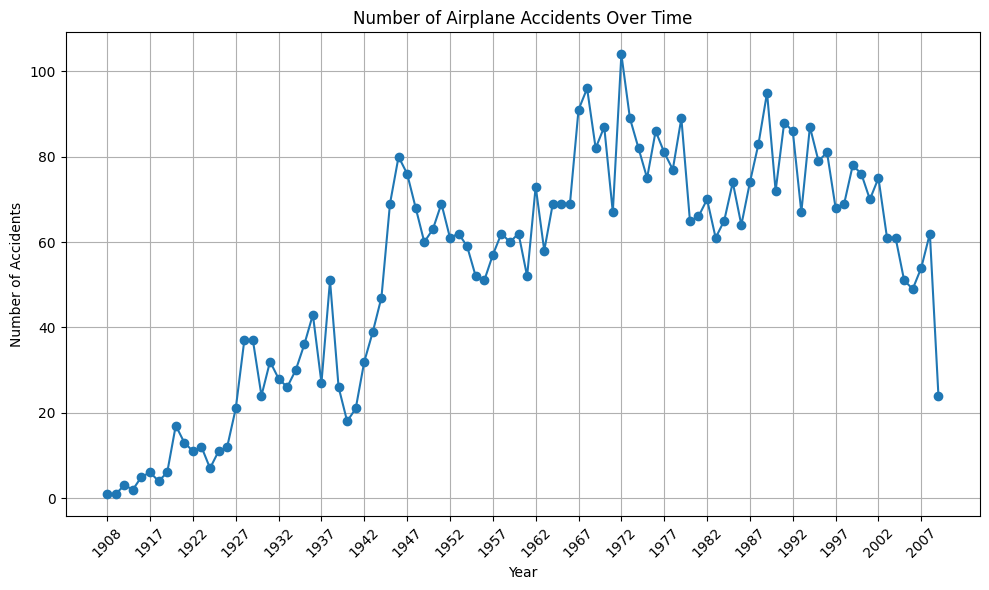

In [3]:
data.crashes_over_time() #mau niha pa to

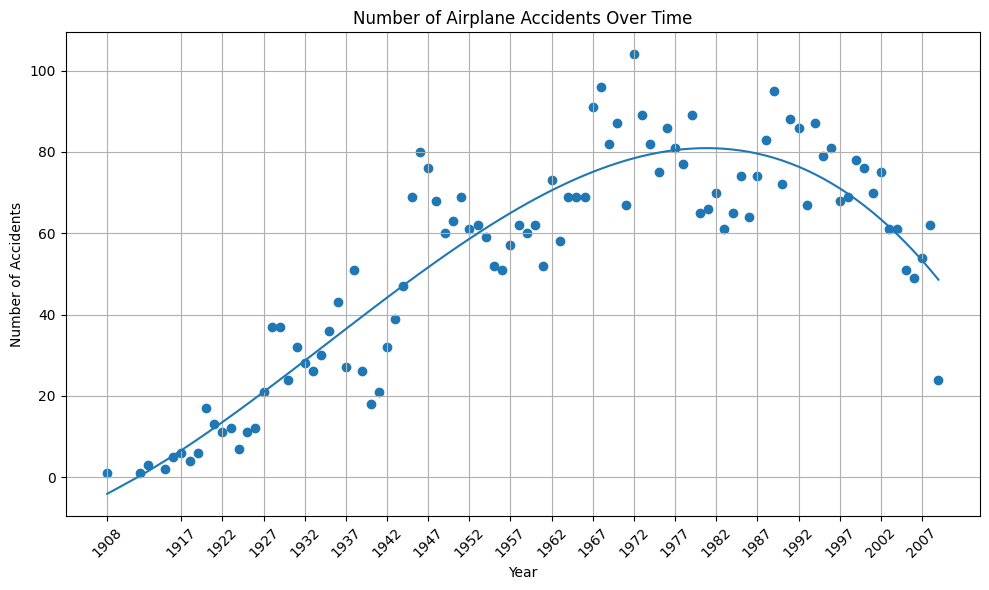

In [4]:
data.crashes_over_time_regression()

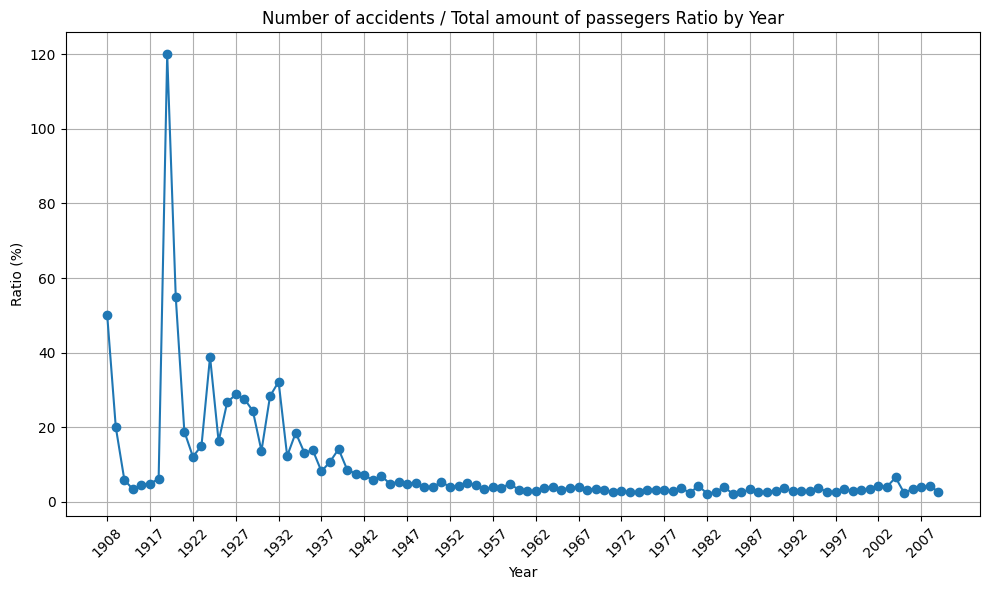

In [5]:
data.ratio_over_time()

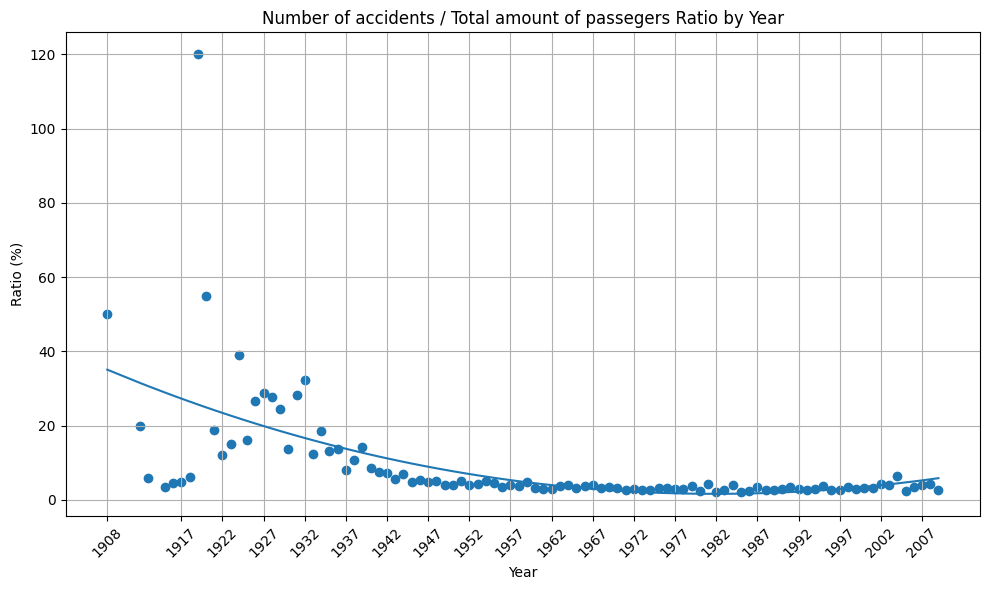

In [6]:
data.ratio_over_time_regression()

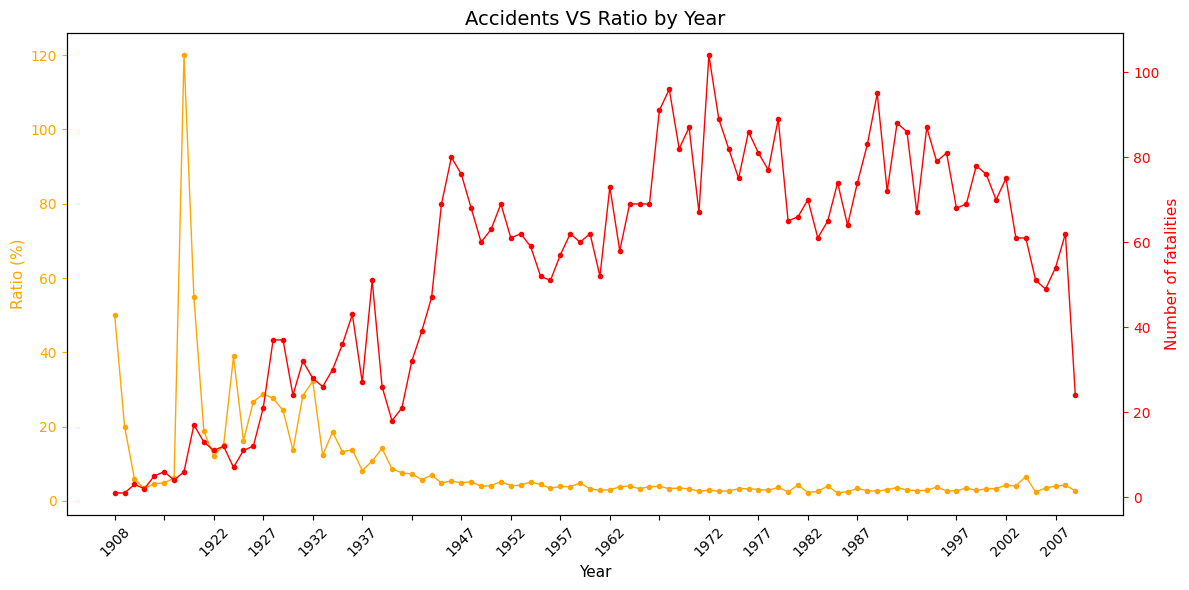

In [7]:
data.fatilities_vs_ratio()

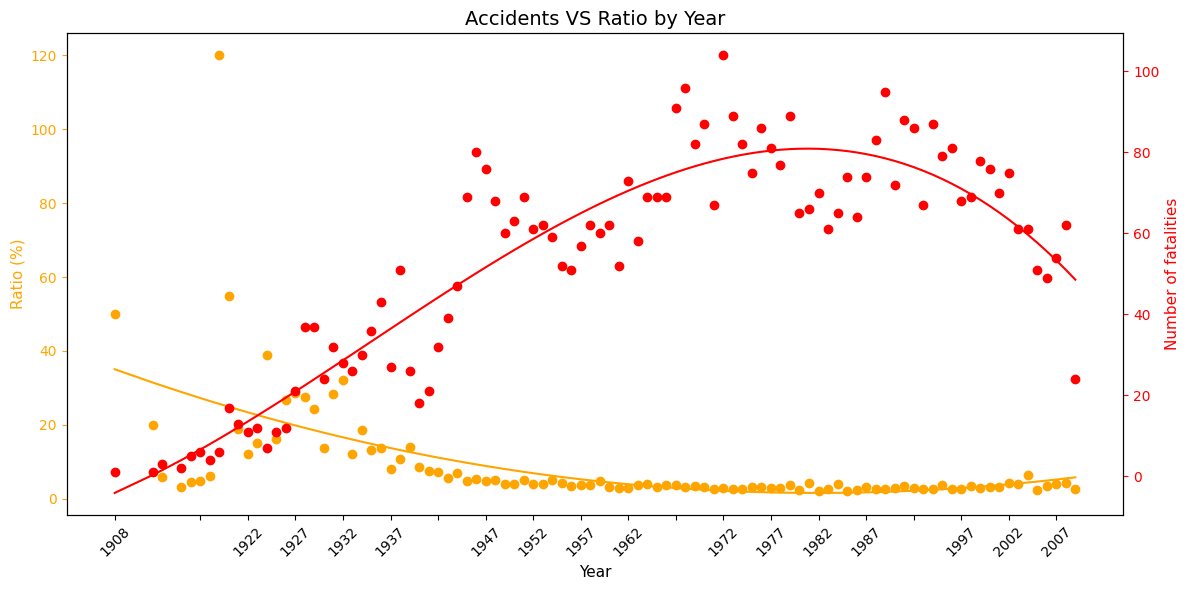

In [8]:
data.fatilities_vs_ratio_regression()

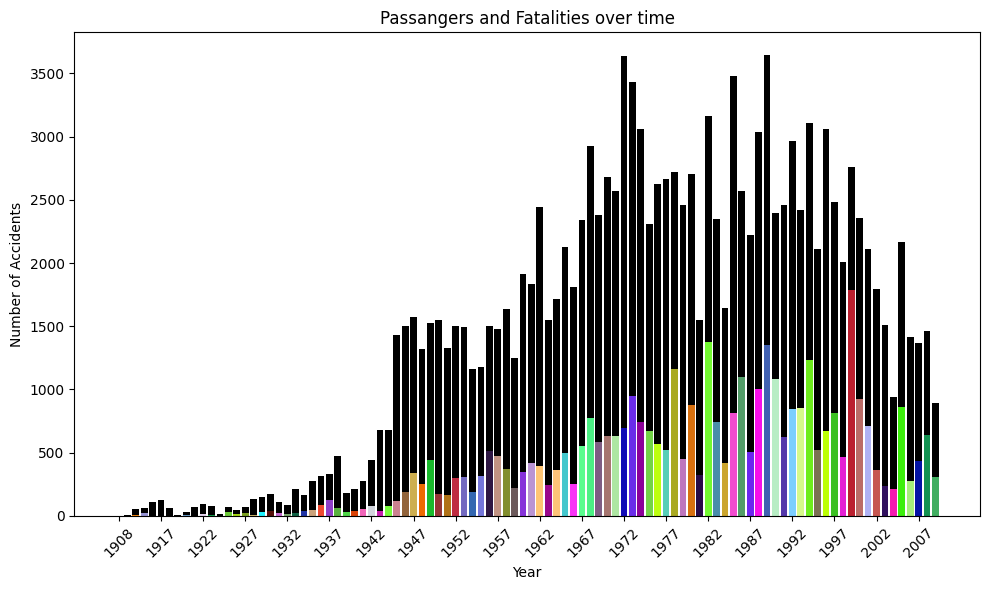

In [9]:
data.passanger_and_fatalities_over_time()

Douglas DC-3 : 334
de Havilland Canada DHC-6 Twin Otter 300 : 81
Douglas C-47A : 74
Douglas C-47 : 62
Douglas DC-4 : 40
Yakovlev YAK-40 : 37
Antonov AN-26 : 36
Junkers JU-52/3m : 32
Douglas C-47B : 29
De Havilland DH-4 : 28


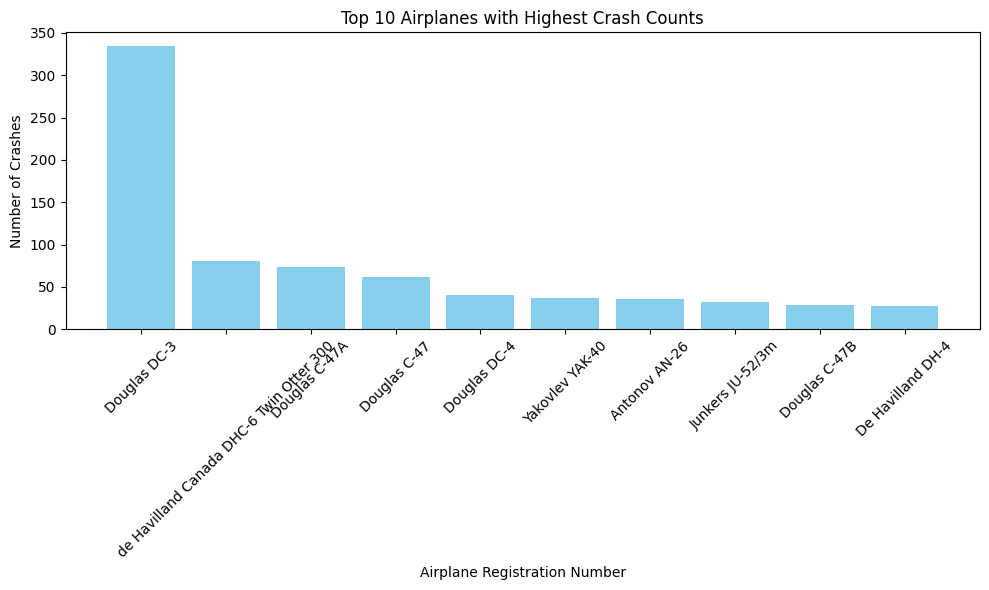

In [10]:
data.highest_crash_counts() #En čas edino prevozniško letalo. 

209


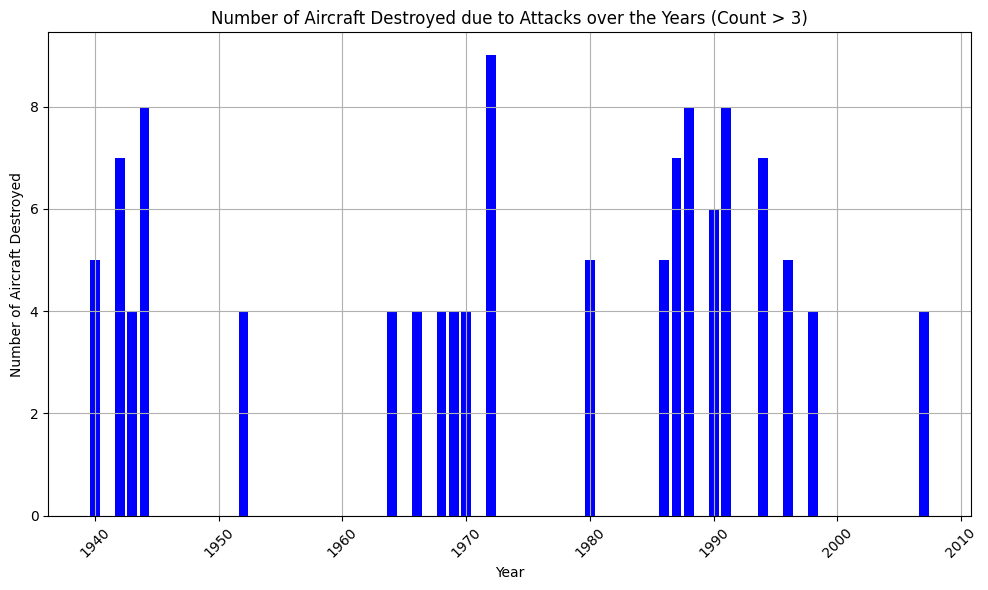

In [11]:
import matplotlib.pyplot as plt
import numpy as np


def unicena_letala():
    unicena = data.extract_data_from_summary(["shoot", "shot", "attack"], ["overshoot", "undershoot"], "Summary")
    print(len(unicena))
    years, counts = np.unique([entry['Date'][-4:] for entry in unicena], return_counts=True)

    years_filtered = years[counts > 3]
    counts_filtered = counts[counts > 3]

    """for year,count in zip(years,counts):
        if(count>3):
            print(year,count)"""

    plt.figure(figsize=(10, 6))
    plt.bar(years_filtered.astype(int), counts_filtered, color='blue')
    plt.xlabel('Year')
    plt.ylabel('Number of Aircraft Destroyed')
    plt.title('Number of Aircraft Destroyed due to Attacks over the Years (Count > 3)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


unicena_letala() 
#Lahko izpišemo še kraj
#1940 - 2 svetovna vojna
#1960 - Vietnamska vojna
#1980 - Falklandska vojna
#1990 - Sovjetska zveza, Jugoslavija...

**Faulty design**

In [12]:
extracted = data.extract_data_from_summary(["faulty design", "design flaw", "design deficiencies"], [], "Summary")
print(len(extracted))


16


**Water**

In [13]:
extracted = data.extract_data_from_summary(["ocean", "water", "swamp", "sea", "river"], [], "Summary")
print(len(extracted))


617


**Low fuel**

In [14]:
extracted = data.extract_data_from_summary(["low fuel", "fuel exhaustion", "ran out of fuel", "running out of fuel"], [], "Summary")
print(len(extracted))


66


**Birds**

In [15]:
extracted = data.extract_data_from_summary(["bird", "geese", "flock"], [], "Summary")
print(len(extracted))

12


### Uspešnost letalskih podjetij glede na število mrtvih, število potnikov in število letov

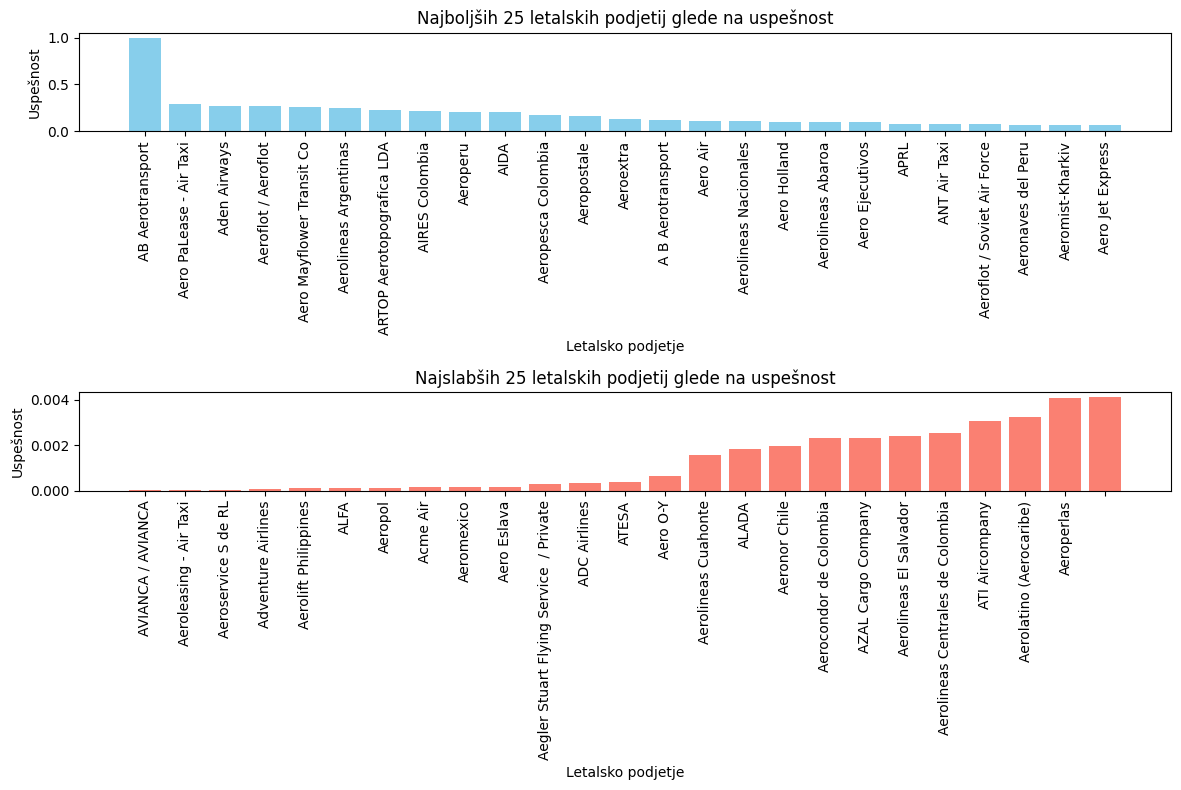

In [16]:
data.operator_performance() # Še enkrat v ChatGPT ali pa razmislimo

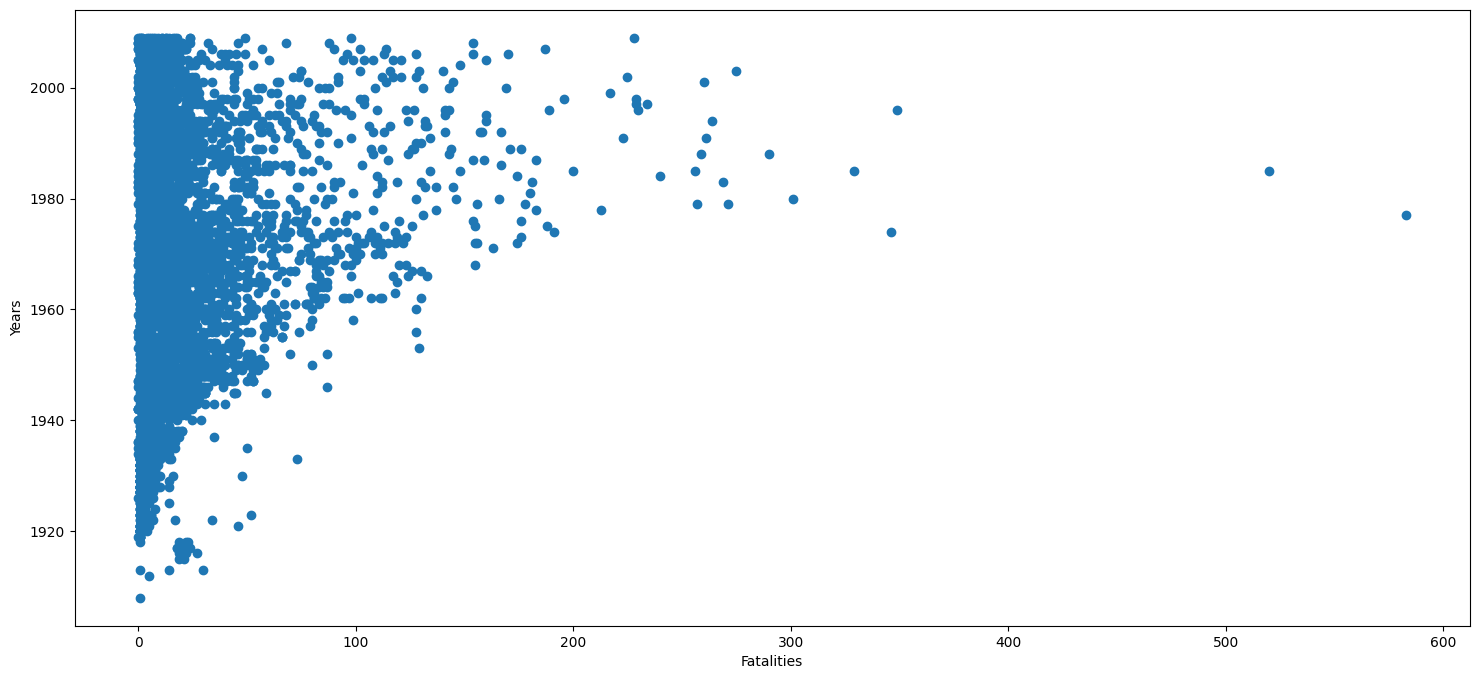

In [17]:
data.deaths_over_time()

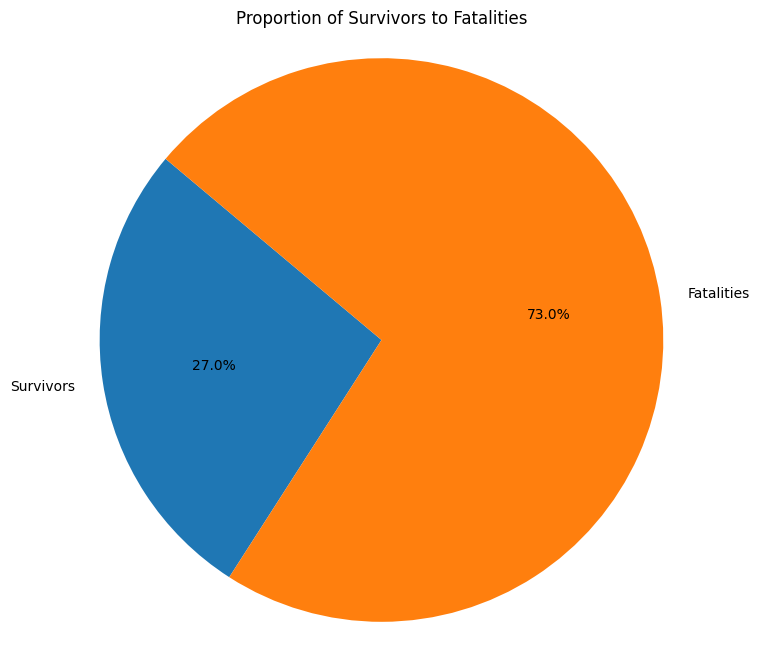

In [18]:
data.ratio_between_aboard_fatal()

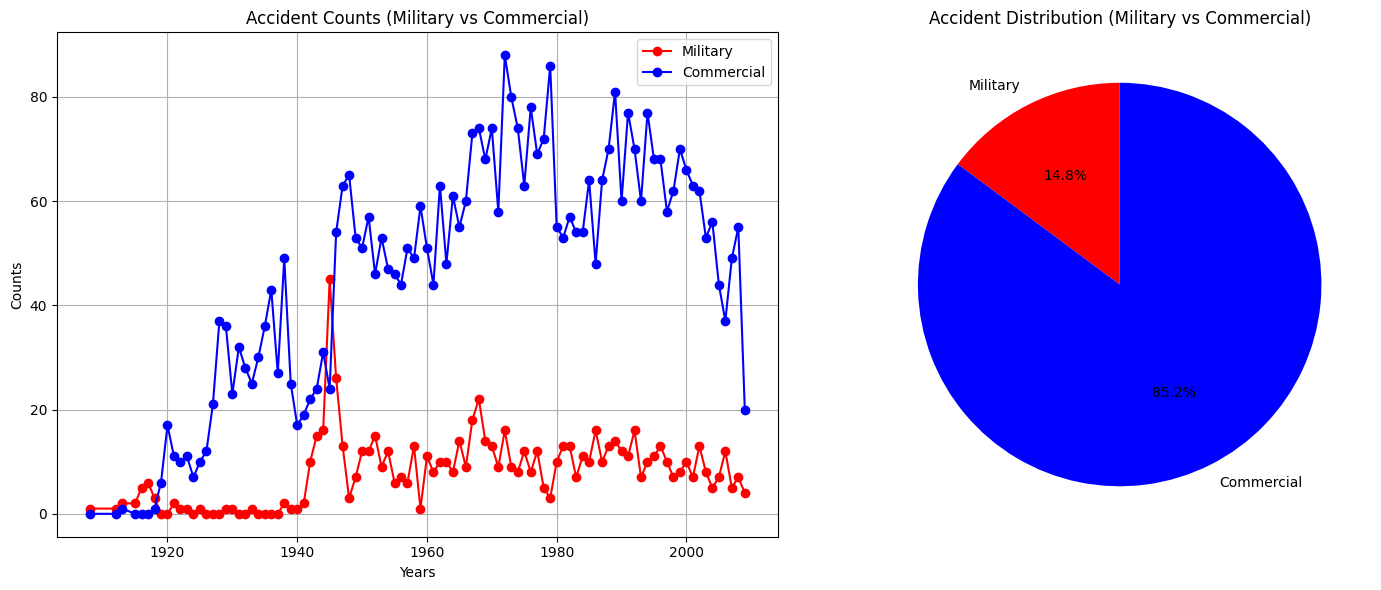

In [19]:
data.type_of_flights()

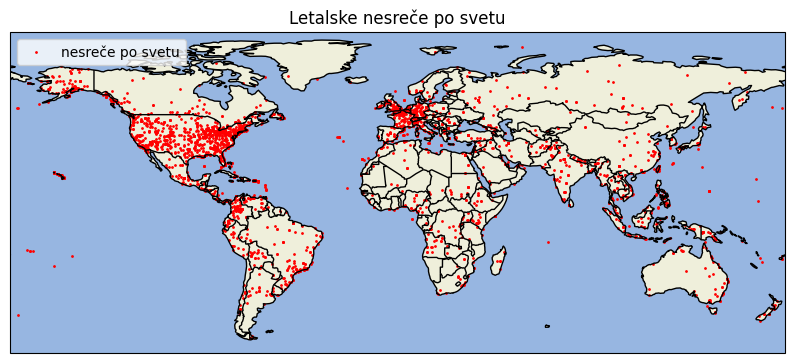

In [18]:
data.crash_locations_on_map()

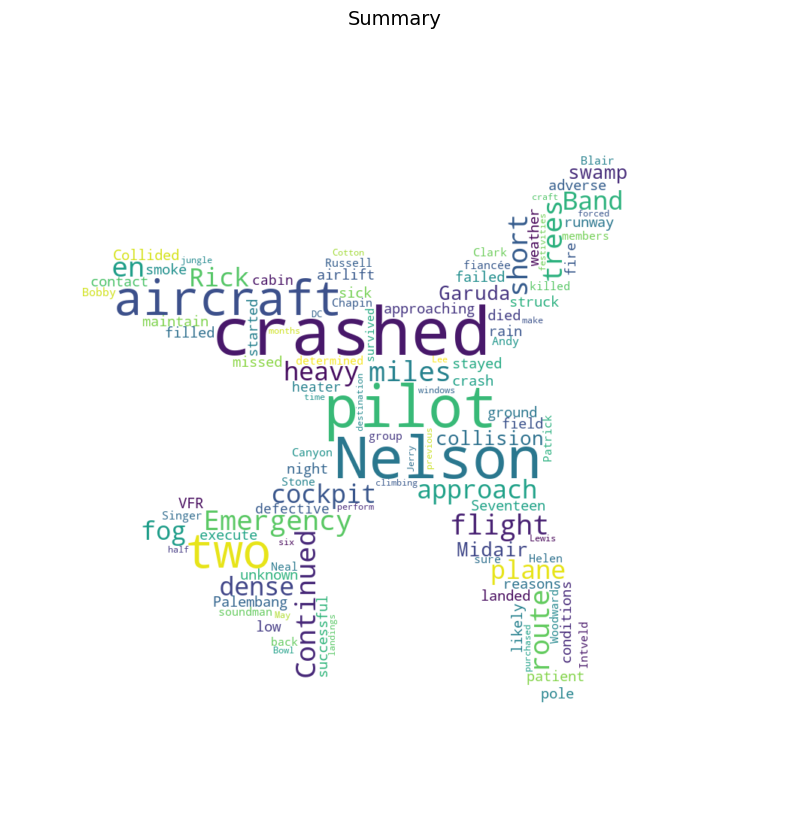

In [19]:
data.wordcloud('Summary')

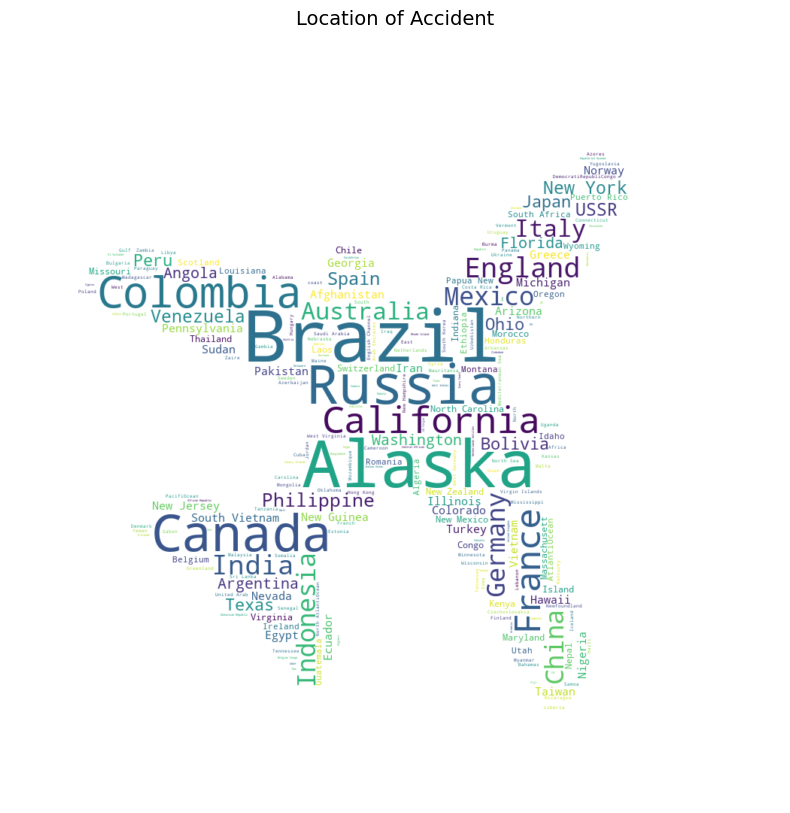

In [20]:
data.countrycloud('Location')

In [21]:
top_operators = data.top_operators('Operator', 3)
print("Operatorji z največ nesrečami:")
for operator, count in top_operators:
    print(f"{operator}: {count} nesreč")

Operatorji z največ nesrečami:
Aeroflot: 179 nesreč
Military - U.S. Air Force: 176 nesreč
Air France: 70 nesreč


Zanimivo je da je največ nesreč bilo pri Ruskemu operatorju in sicer Aeroflot. Pa raziscimo malo...

Narisimo graf, ki bo prikazoval st. nesrec operatorja Aeroflot vsako leto.

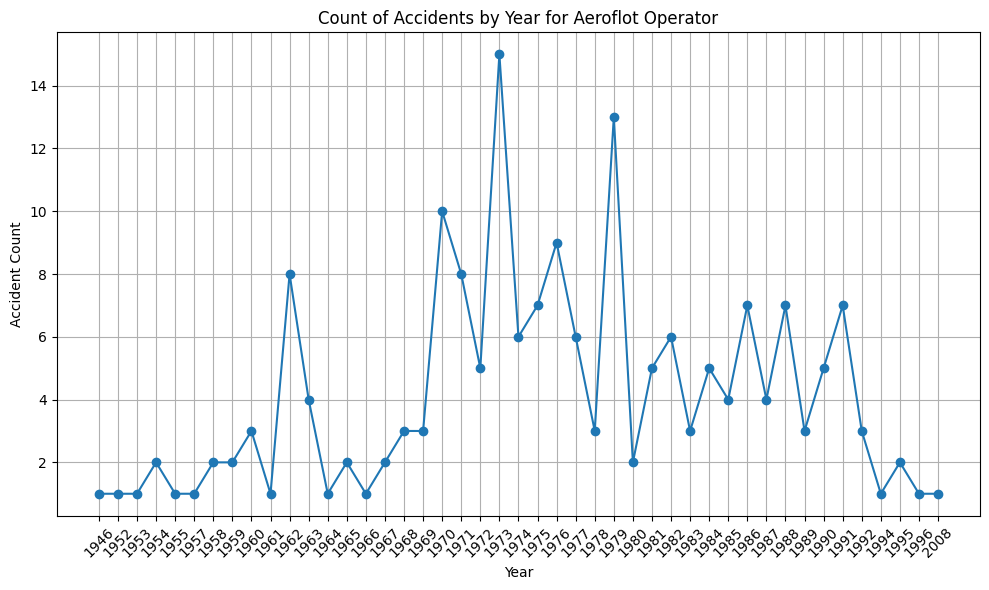

In [22]:
data.count_of_accidents_by_year_operator()

Opazimo da je prišlo do veliko nesreč med letom 1970 in 1990. Po krajšem brskanju na internetu imamo celo wikipedia članek na to temo.
https://en.wikipedia.org/wiki/Aeroflot_accidents_and_incidents_in_the_1970s


Cluster 2:
The aircraft crashed 20 kilometres (12 mi) southeast of Toguchina, after it collided with a weather balloon while en route a domestic scheduled Novosibirsk–Krasnoyarsk passenger service as Flight 1661.
Collided with another An-2TP, tail number CCCP-40563, owing to air traffic controllers error. Landed safely, without any reported fatality on board. All occupants of CCCP-40563 perished in the accident.
Crashed while en route its first leg into a 750-metre-high (2,460 ft) mountain. The aircraft was operating an international scheduled Luanda–Malabo–Kinshasa–Tripoli–Moscow passenger service as Flight 418. The cause was not determined, but radar failure was suspected.
Crashed near Ulan-Ude while on a training flight. Part of the training was to fly the aircraft with one engine out. After the engine was shut down and its propeller feathered, the flight engineer shut down the remaining engine by mistake and a forced landing was carried out.
Hit an ice pinnacle during an emergency 

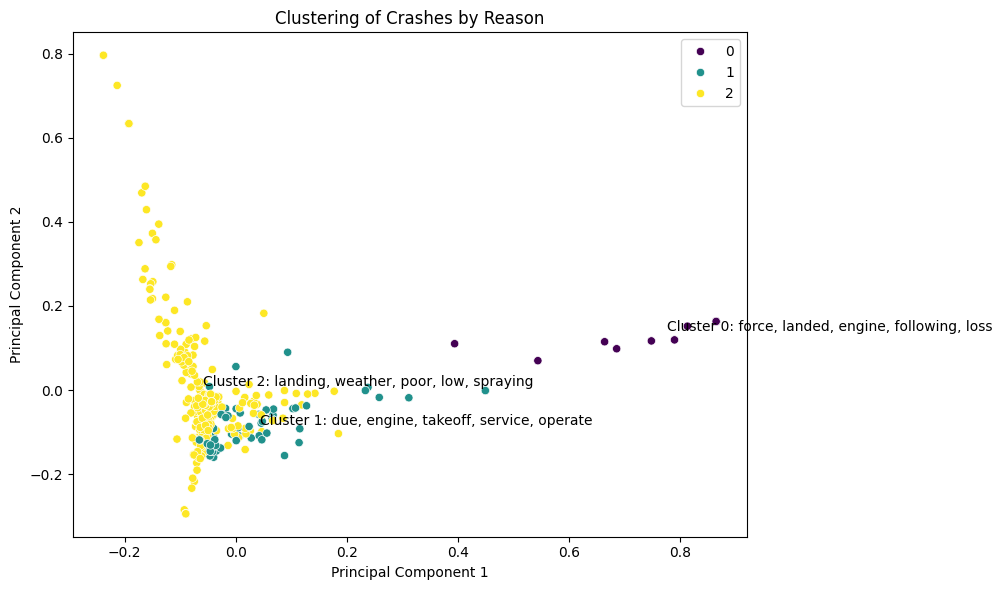

In [23]:
data.cluster_crashes_by_reason()

Cluster 1:
Midair collision between two Garuda aircraft. Both crashed into a swamp while approaching Palembang. Seventeen died on each aircraft.
Emergency flight to airlift sick patient. Collided with trees while en route. Pilot stayed low to maintain ground contact at night. Continued VFR flight into adverse weather conditions.
Crashed 2 miles short of the runway during an approach in fog and heavy rain.
The aircraft broke-up at FL 370 and crashed in the desert. Detonation of an explosive device in the forward cargo compartment.
Following a right turn, after taking off, the plane rolled to the left beyond 90 degrees, went into a steep dive, crashed and exploded in shallow water. Irrational control wheel inputs on the part of the captain after his attitude director indicator malfunctioned leading to complete loss of situational awareness.

Cluster 2:
The aircraft disappeared after entering an area of severe turbulence. Excessive airspeed for area of turbulence. Exceeded design stress l

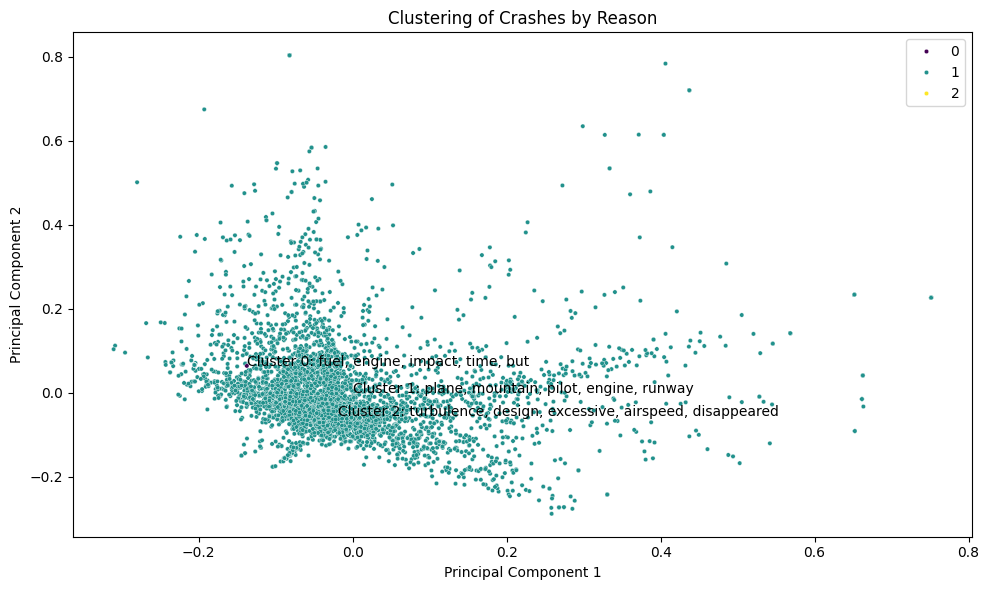

In [24]:
data.cluster_crashes_by_reason_vsi()